<a href="https://colab.research.google.com/github/Rafa2266/MVP-Analise-de-dados/blob/main/mvp_sprint1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gdown

# Definição do problema
O dataset usado nesse projeto é o **Video Game Dataset**, disponibilizado no link https://www.kaggle.com/datasets/jummyegg/rawg-game-dataset/ , ele contém os dados de 474417 videogames, de 50 plataformas diferentes, os dados foram obrtidos através da RAWG API(https://rawg.io/apidocs), com última atualização em 22 de dezembro de 2022, cada linha desse dataset representa um jogo e contém diversas informações sobre este.

O objetivo do dataset é verificar quais são as características que tornam um jogo mais bem avaliado pelos jogadores e crítica especializada ,e que atrai o maior número de jogadores e os retém.

As colunas desse dataset são:



1.   **id:** Um ID exclusivo que identifica este jogo no banco de dados RAWG

1.   **slug:** Um texto único que identifica este jogo no banco de dados RAWG
1.   **name:** Nome do jogo
1.   **metacritic:** Avaliação do jogo no Metacritic
1.   **released:** A data em que o jogo foi lançado
1.   **tba:** Indica se o jogo já tem uma data de lançamento anunciada
1.   **updated:** A data em que o jogo foi atualizado pela última vez
1.   **website:** Website do jogo
1.   **rating:** Classificação escolhida pelos usuários do RAWG
1.   **rating_top:** Classificação máxima
1.   **playtime:** Horas necessárias para completar o jogo
1.   **achievements_count:** Número de conquistas no jogo
1.   **ratings_count:** Número de usuários RAWG que avaliaram o jogo
1.   **suggestions_count:** Número de usuários do RAWG que sugeriram o jogo
1.   **game_series_count:** Número de jogos da série
1.   **reviews_count:** Número de usuários do RAWG que avaliaram o jogo
1.   **platforms:** Plataformas em que o jogo foi lançado. Separados por ||
1.   **developers:** Desenvolvedores do jogo. Separados por ||
1.   **genres:** Gêneros do jogo. Separados por ||
1.   **publishers:** Editores do jogo. Separados por ||
1.   **esrb_rating:** Classificação indicativa do jogo
1.   **added_status_yet:** Número de usuários do RAWG que marcaram o jogo como "Não jogado"
1.   **added_status_owned:** Número de usuários do RAWG que marcaram que possuiam o jogo
1.   **added_status_beaten:** Número de usuários do RAWG que marcaram o jogo como “Concluído”
1.   **added_status_toplay:** Número de usuários do RAWG que marcaram o jogo como “Para jogar”
1.   **added_status_dropped:** Número de usuários do RAWG que marcaram o jogo como “Jogado, mas não vencido”
1.   **added_status_playing:** Número de usuários do RAWG que marcaram o jogo como “Jogando”





In [2]:
import pandas as pd
import gdown
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier # algoritmo Árvore de Classificação
from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste (holdout)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste (holdout)
from sklearn.metrics import accuracy_score # para a exibição da acurácia do modelo
from sklearn.neighbors import KNeighborsClassifier # algoritmo KNN
from sklearn.tree import DecisionTreeClassifier # algoritmo Árvore de Classificação
from sklearn.naive_bayes import GaussianNB # algoritmo Naive Bayes
from sklearn.svm import SVC # algoritmo SVM
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline

# Passo 1
Fazer o download da base de dados em um arquivo excel e converte-lo em uma tabela através do pandas.

In [3]:
file_id ="1hsAT6qR1rW-zcZZA8MtOwH8rT0KmmiTh"
url = f"https://drive.google.com/uc?id={file_id}"
output ="games_info_rating.xlsx"
gdown.download(url, output)

dados_base=pd.read_excel("games_info_rating.xlsx")

Downloading...
From: https://drive.google.com/uc?id=1hsAT6qR1rW-zcZZA8MtOwH8rT0KmmiTh
To: /content/games_info_rating.xlsx
100%|██████████| 72.1M/72.1M [00:01<00:00, 53.1MB/s]


# Passo 2
Analisar qual é a quantidade de registros na base de dados, e verificar quantos valores não nulos temos em cada atributo. Se percebe que o metacritic só tem 4734 registros não nulos em 474419 registros. O que vai reduzir bastante nosso escopo visto que queremos analisar os jogos com base no metacritic.

In [4]:
dados_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474419 entries, 0 to 474418
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   id                    474417 non-null  float64       
 1   slug                  474416 non-null  object        
 2   name                  474417 non-null  object        
 3   metacritic            4734 non-null    float64       
 4   released              450218 non-null  datetime64[ns]
 5   tba                   474417 non-null  float64       
 6   updated               474417 non-null  datetime64[ns]
 7   website               65043 non-null   object        
 8   rating                474418 non-null  float64       
 9   rating_top            474418 non-null  float64       
 10  playtime              474417 non-null  float64       
 11  achievements_count    474417 non-null  float64       
 12  ratings_count         474417 non-null  float64       
 13 

# Passo 3
Como o atributo 'platforms' possui mais de 5 mil valores distintos e é uma importante influência pro metacritic já que cada plataforma busca garantir um padrão de qualidade em seus jogos. Vamos transformar esse atributo em vários outros.

In [5]:
len(dados_base['platforms'].unique())

5149

In [ ]:
for plat in dados_base['platforms'].unique() :
  print(plat)

# Passo 4
Observando as plataformas que os jogos são lançados e tendo um conhecimento prévio do padrão de plataformas que os jogos são lançados, foram criados 5 novas colunas (xbox, playstation, pc, nintendo, cell_phone),cada uma informando se o jogo foi lançado ou não na plataforma através de um boolean. Além disso também foi criado a coluna 'number_plataforms' que contém o número de plataformas em que o jogo foi lançado.

Estas alterações foram feitas para poder analisar melhor a relação da escolha sobre quais plataformas lançar o jogo e a quantidade de plataformas que o jogo foi lançado com o metacritic.

In [7]:
dados_base['xbox']=(dados_base['platforms'].str.lower()).str.find('xbox')>0
dados_base['playstation']=((dados_base['platforms'].str.lower()).str.find('playstation')>0) |  ((dados_base['platforms'].str.lower()).str.find('ps')>0)
dados_base['pc']=((dados_base['platforms'].str.lower()).str.find('pc')>0) |  ((dados_base['platforms'].str.lower()).str.find('macos')>0) |  ((dados_base['platforms'].str.lower()).str.find('linux')>0)
dados_base['nintendo']=((dados_base['platforms'].str.lower()).str.find('nintendo')>0) |  ((dados_base['platforms'].str.lower()).str.find('wii')>0) |  ((dados_base['platforms'].str.lower()).str.find('boy')>0)
dados_base['cell_phone']=((dados_base['platforms'].str.lower()).str.find('ios')>0) |  ((dados_base['platforms'].str.lower()).str.find('android')>0)

dados_base['platforms']=dados_base['platforms'].str.replace('|',',')
dados_base['number_plataforms']= dados_base['platforms'].str.count(',,')+1


<ipython-input-7-1516b003cbfd>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dados_base['platforms']=dados_base['platforms'].str.replace('|',',')


# Passo 5

A parti de agora as colunas vão ser filtradas , selecionando apenas aquelas que possuem algum valor para a análise. Colunas com valores muito específicos sobre o jogo como id, slug, name, publishers, website, developers, release, updated, genres e platforms. Além dessas colunas também foram removidas as reviews_count,  ratings_count, rating e rating_top, pois são dados mais ligados a plataforma em que os jogos foram avaliados, e também foi removida a coluna added_status_playing, pois representa uma iinformação específica do momento em que os dados foram coletados.

In [19]:
dados_filtrados=dados_base.filter(items=['metacritic','playtime','achievements_count','xbox','nintendo','playstation','pc','cell_phone','game_series_count','number_plataforms','esrb_rating','added_status_yet','added_status_owned','added_status_beaten','added_status_toplay','added_status_dropped'])

In [20]:
dados_filtrados.columns

Index(['metacritic', 'playtime', 'achievements_count', 'xbox', 'nintendo',
       'playstation', 'pc', 'cell_phone', 'game_series_count',
       'number_plataforms', 'esrb_rating', 'added_status_yet',
       'added_status_owned', 'added_status_beaten', 'added_status_toplay',
       'added_status_dropped'],
      dtype='object')

#Passo 6
O próximo passo seria remover os os registros que contém atributos nulos, além disso também transformamos os 0 em 1 do game_series_count (já que todo jogo tem pelo menos um membro de sua franquia), removemos os jogos com classificação indicativa pendente e criamos um atributos novo pra dividir as notas do metacritic em três categorias (jogos com nota acima de 80, entre 80 e 60, menores que 60). Como observado nas informações do dados_filtrados, não se tem mais dados nulos, sobrando 2536 registros.

In [21]:
dados_filtrados['esrb_rating'].unique()

array(['Everyone 10+', 'Everyone', 'Teen', nan, 'Mature', 'Adults Only',
       'Rating Pending'], dtype=object)

In [22]:
dados_filtrados=dados_filtrados[dados_filtrados['metacritic'].notnull()]
dados_filtrados=dados_filtrados[dados_filtrados['esrb_rating'].notnull()]
dados_filtrados=dados_filtrados[dados_filtrados['playtime'].notnull()]
dados_filtrados=dados_filtrados[dados_filtrados['number_plataforms'].notnull()]
dados_filtrados=dados_filtrados[dados_filtrados['achievements_count'].notnull()]
dados_filtrados=dados_filtrados[dados_filtrados['game_series_count'].notnull()]
dados_filtrados['game_series_count']=np.where(dados_filtrados['game_series_count']==0,1,dados_filtrados['game_series_count'])
dados_filtrados=dados_filtrados[dados_filtrados['esrb_rating']!='Rating Pending']
dados_filtrados['metacritic_class']= np.where((dados_filtrados['metacritic']>=80),'80+',np.where((dados_filtrados['metacritic']<80) & (dados_filtrados['metacritic']>=60),'80-60','60-'))

In [23]:
dados_filtrados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2536 entries, 85 to 474136
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   metacritic            2536 non-null   float64
 1   playtime              2536 non-null   float64
 2   achievements_count    2536 non-null   float64
 3   xbox                  2536 non-null   bool   
 4   nintendo              2536 non-null   bool   
 5   playstation           2536 non-null   bool   
 6   pc                    2536 non-null   bool   
 7   cell_phone            2536 non-null   bool   
 8   game_series_count     2536 non-null   float64
 9   number_plataforms     2536 non-null   float64
 10  esrb_rating           2536 non-null   object 
 11  added_status_yet      2536 non-null   float64
 12  added_status_owned    2536 non-null   float64
 13  added_status_beaten   2536 non-null   float64
 14  added_status_toplay   2536 non-null   float64
 15  added_status_dropp

# Passo 7
Para a análise dos dados vamos remover alguns registros que possuem dados muito discrepantes do resto dos registros, e a parti disso vai ser constuído diversos gráficos relacionando as notas do metacritic com características do jogo e o comportamento de seus jogadores em relação a ele.

In [24]:
dados_pl_meta=dados_filtrados
dados_pl_meta=dados_pl_meta[dados_pl_meta['playtime']<200]
dados_pl_meta=dados_pl_meta[dados_pl_meta['added_status_toplay']<2000]
dados_pl_meta=dados_pl_meta[dados_pl_meta['achievements_count']<600]
dados_pl_meta=dados_pl_meta[dados_pl_meta['number_plataforms']<20]

In [25]:
dados_pl_meta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2531 entries, 85 to 474136
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   metacritic            2531 non-null   float64
 1   playtime              2531 non-null   float64
 2   achievements_count    2531 non-null   float64
 3   xbox                  2531 non-null   bool   
 4   nintendo              2531 non-null   bool   
 5   playstation           2531 non-null   bool   
 6   pc                    2531 non-null   bool   
 7   cell_phone            2531 non-null   bool   
 8   game_series_count     2531 non-null   float64
 9   number_plataforms     2531 non-null   float64
 10  esrb_rating           2531 non-null   object 
 11  added_status_yet      2531 non-null   float64
 12  added_status_owned    2531 non-null   float64
 13  added_status_beaten   2531 non-null   float64
 14  added_status_toplay   2531 non-null   float64
 15  added_status_dropp

## Relação das notas do metacritic com o tempo de duração do jogo
Se observa nesse gráfico que jogos de duração maior tendem a terem notas mais altas no metacritic.

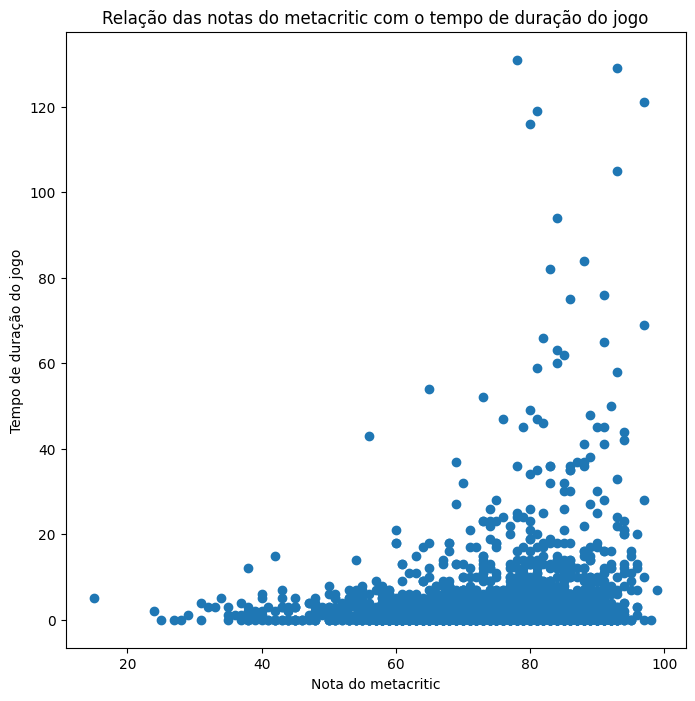

In [26]:
# Prepara a figura (fig) e a área do gráfico (ax) com largura 8 e altura 8
fig, ax = plt.subplots(figsize = (8, 8))

# Plota o gráfico de dispersão
ax.scatter(x = dados_pl_meta['metacritic'], y = dados_pl_meta['playtime'])

# Acrescenta um título ao gráfico
ax.set_title('Relação das notas do metacritic com o tempo de duração do jogo')

# Define os rótulos dos eixos
ax.set_xlabel('Nota do metacritic') # é importante esclarecer a unidade e a ordem de grandeza
ax.set_ylabel('Tempo de duração do jogo') # é importante esclarecer a unidade e a ordem de grandeza

# Exibe o gráfico
plt.show()

## Relação das notas do metacritic com o número de jogadores que desejam o jogo
Se observa nesse gráfico que jogos com notas mais altas no metacritic tendem a ter um maior numeros de jogadores que desejam comprar o jogo. A parti da nota 60 esse padrão fica mais claro. O que demonstra o poder de influência do metacritic.


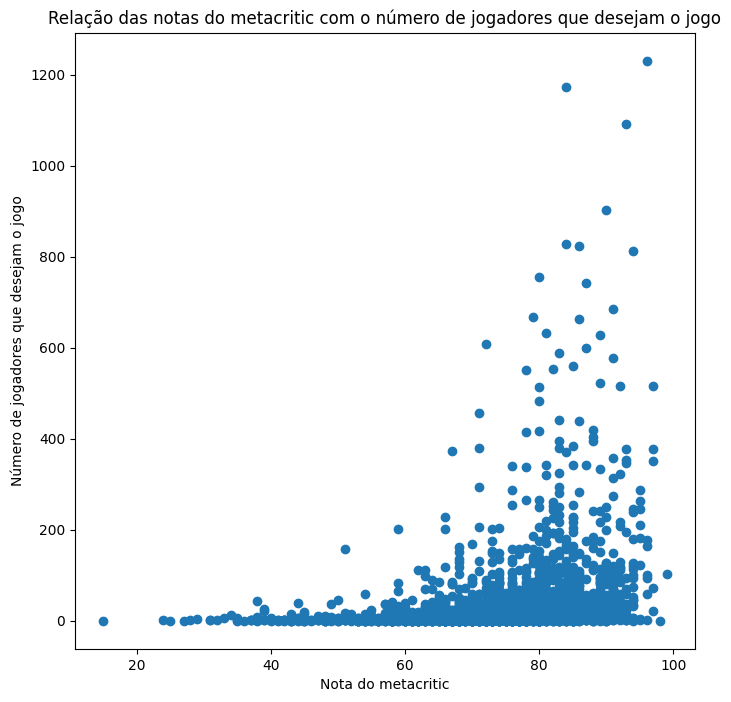

In [27]:
# Prepara a figura (fig) e a área do gráfico (ax) com largura 8 e altura 8
fig, ax = plt.subplots(figsize = (8, 8))

# Plota o gráfico de dispersão
ax.scatter(x = dados_pl_meta['metacritic'], y = dados_pl_meta['added_status_toplay'])

# Acrescenta um título ao gráfico
ax.set_title('Relação das notas do metacritic com o número de jogadores que desejam o jogo')

# Define os rótulos dos eixos
ax.set_xlabel('Nota do metacritic') # é importante esclarecer a unidade e a ordem de grandeza
ax.set_ylabel('Número de jogadores que desejam o jogo') # é importante esclarecer a unidade e a ordem de grandeza

# Exibe o gráfico
plt.show()

## Relação das notas do metacritic com o número de compradores do jogo
Se observa nesse gráfico que jogos com notas mais altas no metacritic tendem a ter um maior numeros de jogadores que compraram o jogo. Essa tenência vai ficando mais clara parti da nota 60, aumentando progressivamente.O que demonstra o poder de influência do metacritic.

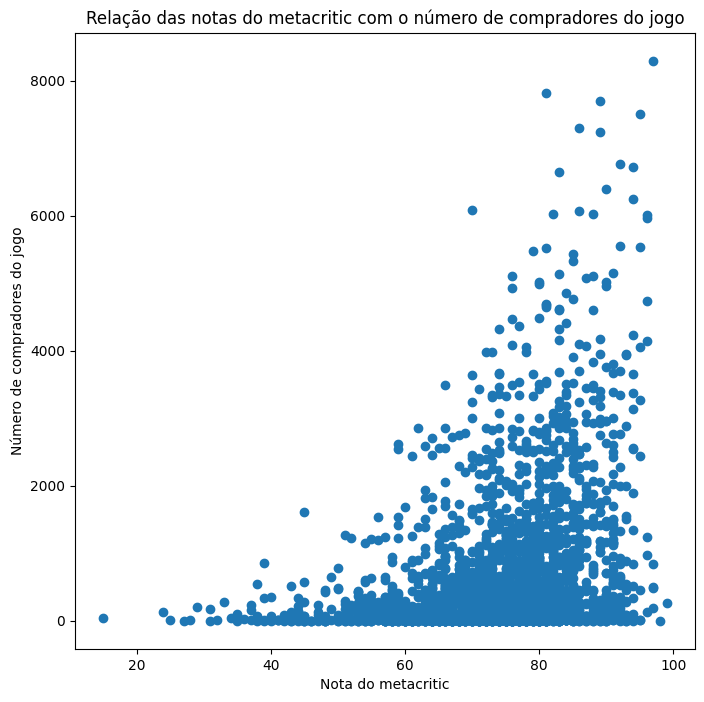

In [28]:
# Prepara a figura (fig) e a área do gráfico (ax) com largura 8 e altura 8
fig, ax = plt.subplots(figsize = (8, 8))

# Plota o gráfico de dispersão
ax.scatter(x = dados_pl_meta['metacritic'], y = dados_pl_meta['added_status_owned'])

# Acrescenta um título ao gráfico
ax.set_title('Relação das notas do metacritic com o número de compradores do jogo')

# Define os rótulos dos eixos
ax.set_xlabel('Nota do metacritic') # é importante esclarecer a unidade e a ordem de grandeza
ax.set_ylabel('Número de compradores do jogo') # é importante esclarecer a unidade e a ordem de grandeza

# Exibe o gráfico
plt.show()

## Relação das notas do metacritic com o número de jogadores que abandonaram o jogo
Se pode observar que o número de jagadores que abandonaram o jogo é maior nos jogos que possuem notas entre 70 e 90. O que indica que as vezes as notas altas podem gerar uma decepção

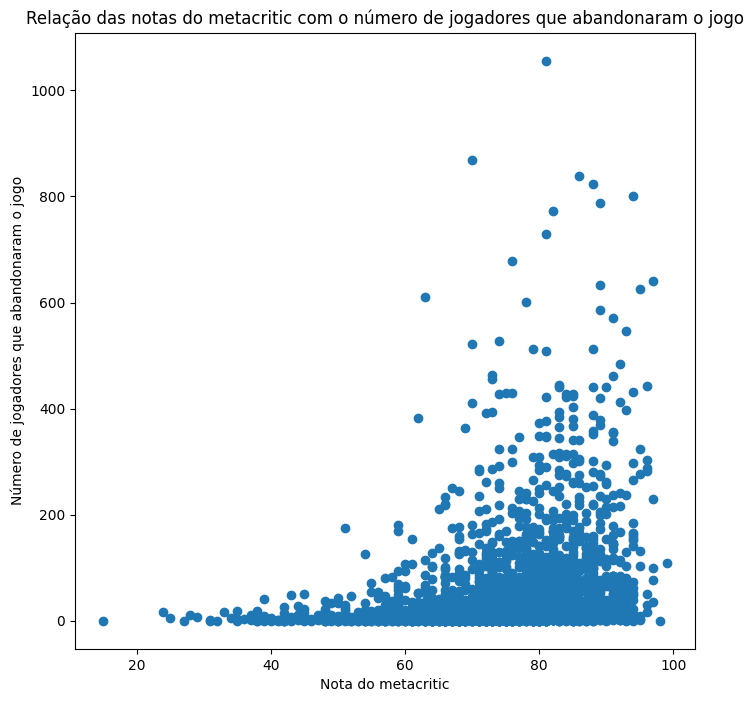

In [18]:
# Prepara a figura (fig) e a área do gráfico (ax) com largura 8 e altura 8
fig, ax = plt.subplots(figsize = (8, 8))

# Plota o gráfico de dispersão
ax.scatter(x = dados_pl_meta['metacritic'], y = dados_pl_meta['added_status_dropped'])

# Acrescenta um título ao gráfico
ax.set_title('Relação das notas do metacritic com o número de jogadores que abandonaram o jogo')

# Define os rótulos dos eixos
ax.set_xlabel('Nota do metacritic') # é importante esclarecer a unidade e a ordem de grandeza
ax.set_ylabel('Número de jogadores que abandonaram o jogo') # é importante esclarecer a unidade e a ordem de grandeza

# Exibe o gráfico
plt.show()

## Relação das notas do metacritic com o número de jogadores que concluíram o jogo
Se observa nesse gráfico que jogos com notas mais altas no metacritic tendem a ter um maior numeros de jogadores que completaram o jogo. A parti da nota 70 esse padrão fica mais claro. O que mostra que em grande maioria os jogos com boas notas agradam os jogadores de fato.


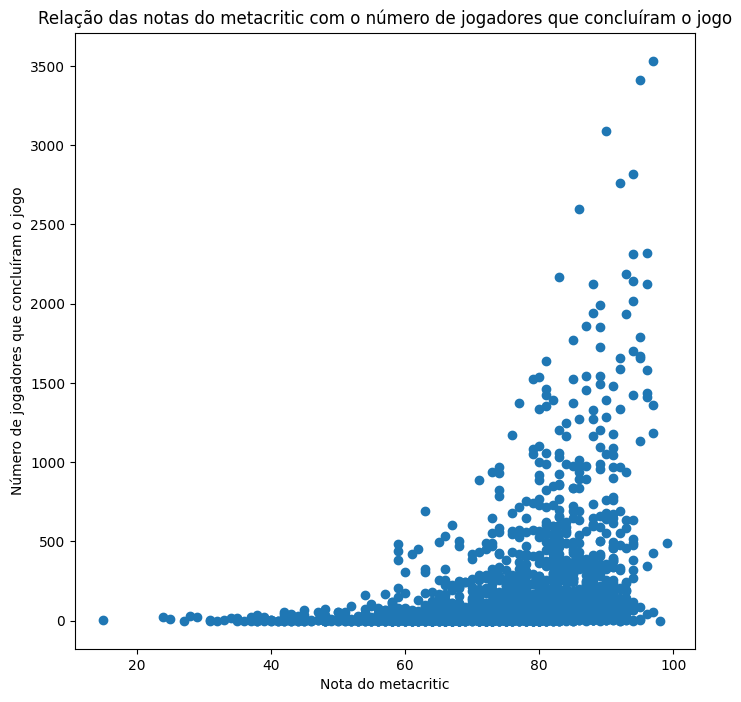

In [ ]:
# Prepara a figura (fig) e a área do gráfico (ax) com largura 8 e altura 8
fig, ax = plt.subplots(figsize = (8, 8))

# Plota o gráfico de dispersão
ax.scatter(x = dados_pl_meta['metacritic'], y = dados_pl_meta['added_status_beaten'])

# Acrescenta um título ao gráfico
ax.set_title('Relação das notas do metacritic com o número de jogadores que concluíram o jogo')

# Define os rótulos dos eixos
ax.set_xlabel('Nota do metacritic') # é importante esclarecer a unidade e a ordem de grandeza
ax.set_ylabel('Número de jogadores que concluíram o jogo') # é importante esclarecer a unidade e a ordem de grandeza

# Exibe o gráfico
plt.show()

## Relação das notas do metacritic com a faixa etária do jogo
Se observa que não existe um padrão muito claro entre a faixa etária do jogo e as notas do metacritic.

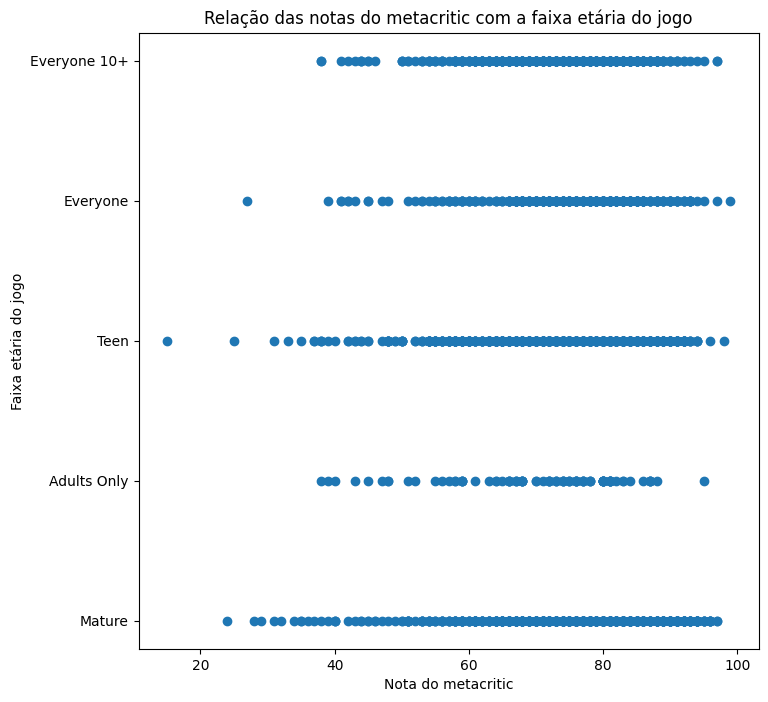

In [ ]:
# Prepara a figura (fig) e a área do gráfico (ax) com largura 8 e altura 8
fig, ax = plt.subplots(figsize = (8, 8))

# Plota o gráfico de dispersão
ax.scatter(x = dados_pl_meta['metacritic'], y = dados_pl_meta['esrb_rating'])

# Acrescenta um título ao gráfico
ax.set_title('Relação das notas do metacritic com a faixa etária do jogo')

# Define os rótulos dos eixos
ax.set_xlabel('Nota do metacritic') # é importante esclarecer a unidade e a ordem de grandeza
ax.set_ylabel('Faixa etária do jogo') # é importante esclarecer a unidade e a ordem de grandeza

# Exibe o gráfico
plt.show()

## Relação das notas do metacritic com o número de conquistas que o jogo possui
Se observa que os jogos com o maior número conquistas possuem notas entre 60 e 90.O que mostra que muitas conquistas são características de jogos regulares.

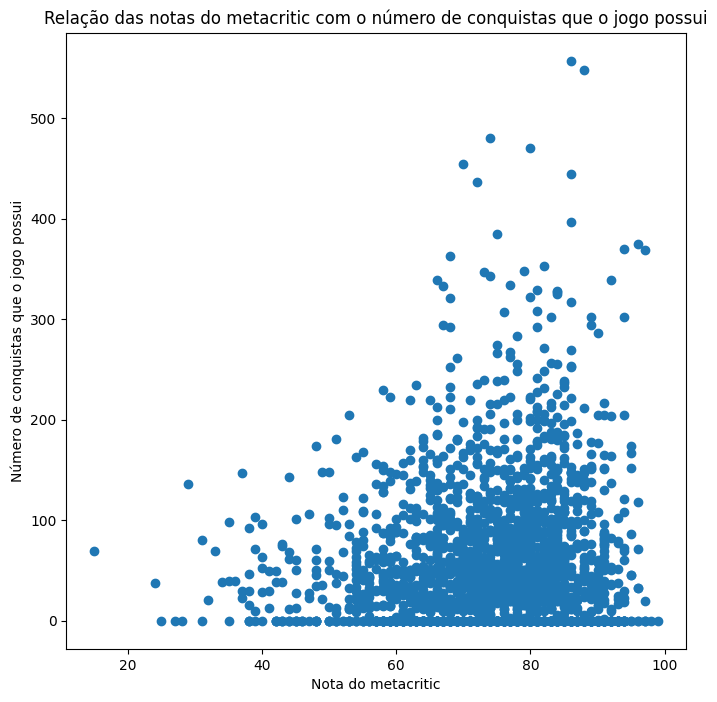

In [ ]:
# Prepara a figura (fig) e a área do gráfico (ax) com largura 8 e altura 8
fig, ax = plt.subplots(figsize = (8, 8))

# Plota o gráfico de dispersão
ax.scatter(x = dados_pl_meta['metacritic'], y = dados_pl_meta['achievements_count'])

# Acrescenta um título ao gráfico
ax.set_title('Relação das notas do metacritic com o número de conquistas que o jogo possui')

# Define os rótulos dos eixos
ax.set_xlabel('Nota do metacritic') # é importante esclarecer a unidade e a ordem de grandeza
ax.set_ylabel('Número de conquistas que o jogo possui') # é importante esclarecer a unidade e a ordem de grandeza

# Exibe o gráfico
plt.show()

## Relação das notas do metacritic com o número de jogos da série
Se observa que os jogos com o maior número de jogos na franquia possuem notas entre 60 e 100, tendo um acréscimo a mais entre 70 e 90. O que demonstra ser uma característica principalmente de jogos regulares.

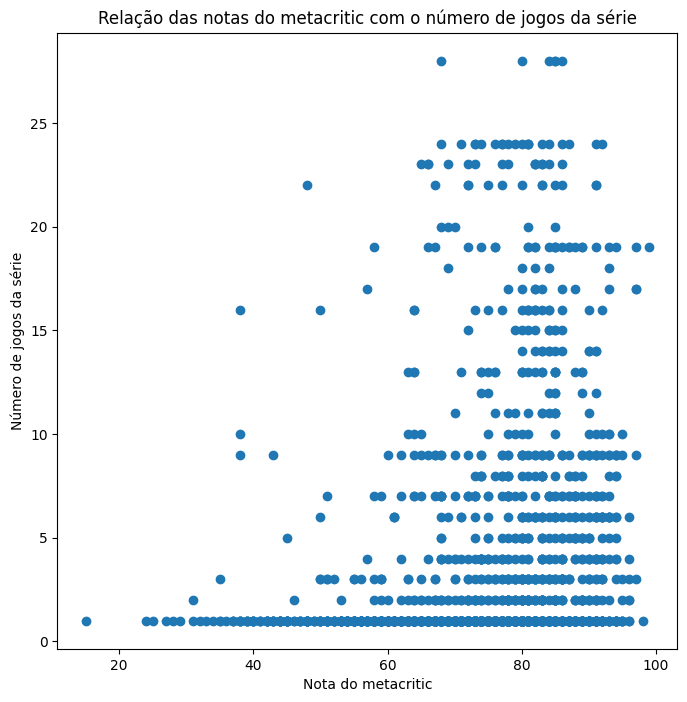

In [ ]:
# Prepara a figura (fig) e a área do gráfico (ax) com largura 8 e altura 8
fig, ax = plt.subplots(figsize = (8, 8))

# Plota o gráfico de dispersão
ax.scatter(x = dados_pl_meta['metacritic'], y = dados_pl_meta['game_series_count'])

# Acrescenta um título ao gráfico
ax.set_title('Relação das notas do metacritic com o número de jogos da série')

# Define os rótulos dos eixos
ax.set_xlabel('Nota do metacritic') # é importante esclarecer a unidade e a ordem de grandeza
ax.set_ylabel('Número de jogos da série') # é importante esclarecer a unidade e a ordem de grandeza

# Exibe o gráfico
plt.show()

## Relação das notas do metacritic com o número de plataformas que o jogo lançou
Se observa que os jogos que lnçam em mais plataformas tendem a ter notas maiores no metacritic. Se concentrando principalmente próximo a nota 80.

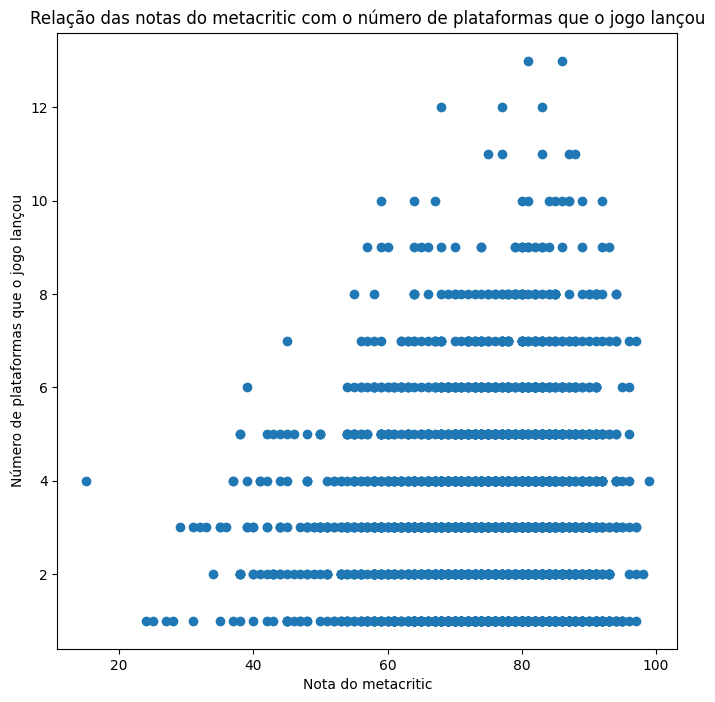

In [ ]:
# Prepara a figura (fig) e a área do gráfico (ax) com largura 8 e altura 8
fig, ax = plt.subplots(figsize = (8, 8))

# Plota o gráfico de dispersão
ax.scatter(x = dados_pl_meta['metacritic'], y = dados_pl_meta['number_plataforms'])

# Acrescenta um título ao gráfico
ax.set_title('Relação das notas do metacritic com o número de plataformas que o jogo lançou')

# Define os rótulos dos eixos
ax.set_xlabel('Nota do metacritic') # é importante esclarecer a unidade e a ordem de grandeza
ax.set_ylabel('Número de plataformas que o jogo lançou') # é importante esclarecer a unidade e a ordem de grandeza

# Exibe o gráfico
plt.show()

# Passo 8
Com a análise dos gráficos acima se percebe que certas característcas dos jogos influenciam na nota do metacritic, e que a nota do metacritic também influencia na recepção dos jogadores, já que eles desejam e compram os jogos com as maiores notas, apesar de também abandonarem boa parte desses jogos também.

Agora vai ser analisado como é a distribuição dos jogos entre as plataformas. E para isso vamos criar uma base de dados diferente para cada plataforma que criamos uma coluna anteriormente no **Passo 4**.

Se observa que o Playstation possui o maior número de jogos nessa base de dados, seguido pelo PC e XBOX logo atrás. E com os menores números de jogos está a Nintendo com quase 600 e os celulares com um pouco mais que a metade da quantidade de jogos da Nintendo.

In [29]:
dados_xbox=dados_filtrados[dados_filtrados['xbox']==True]
dados_plays=dados_filtrados[dados_filtrados['playstation']==True]
dados_nint=dados_filtrados[dados_filtrados['nintendo']==True]
dados_pc=dados_filtrados[dados_filtrados['pc']==True]
dados_cell=dados_filtrados[dados_filtrados['cell_phone']==True]


print(len(dados_xbox))
print(len(dados_plays))
print(len(dados_nint))
print(len(dados_pc))
print(len(dados_cell))
color_xbox='#02cc49'
color_plays='#152cc2'
color_nint='#d11323'
color_pc='#af0be0'
color_cell='#0af2df'

def transToPorcen(dados,dados_agrupados):
  return [f"{round((a/len(dados))*100,2)}%" for a in dados_agrupados['metacritic']]

1026
1278
597
1069
324


## Relação das notas do metacritic com as plataformas
Analisando os gráficos de barras das plataformas se nota que os jogos de celulares são os que possuem a maior porcentagem de jogos com notas acima de 80 no metacritic (40,43%), é claro que precisa considerar que poucos jogos de celular são avaliados no metacritic, o que indica que provavelmente só os que conseguiram um maior destaque são avaliados, o que garante que a maior parte dos jogos de celular avaliados serão os melhores.Os celulares também possui a menor quantidade de jogos ruins avaliados (6,79% abaixo de 60 no metacritic)

Em segundo lugar é a Nintendo(38,36% dos jogos com notas acima de 80) que também possui uma quantidade menor de jogos avaliados em relação as outras plataformas, além disso também possui a segunda maior quantidade maior de jogos avaliados como ruins(11,06%).

Em terceiro lugar está a plataforma PC com 38,17% de seus jogos avaliados como bons(acima de 80), e além disso também é a segunda plataforma com mais jogos avaliados e também a segunda menor porcentagem de jogos ruins(9,54%)

Em quarto lugar está a Playstation com 35,99% de seus jogos avaliados como bons e ela possui também o maior número de jogos avaliados, apesar de também ter a maior porcentagem de jogos considerados ruins(11,35%). É interessante observar também que o Playstation é o que possui o maior número absoluto de jogos avaliados como bons.

Em último lugar está o Xbox com 32,26% dos sus jogos sendo considerados bons, apesar de ter a maior taxa de jogos regulares(57,50% de jogos com a nota entre 60 e 80) e também a terceira menor porcentagem de jogos ruins (10,23%)

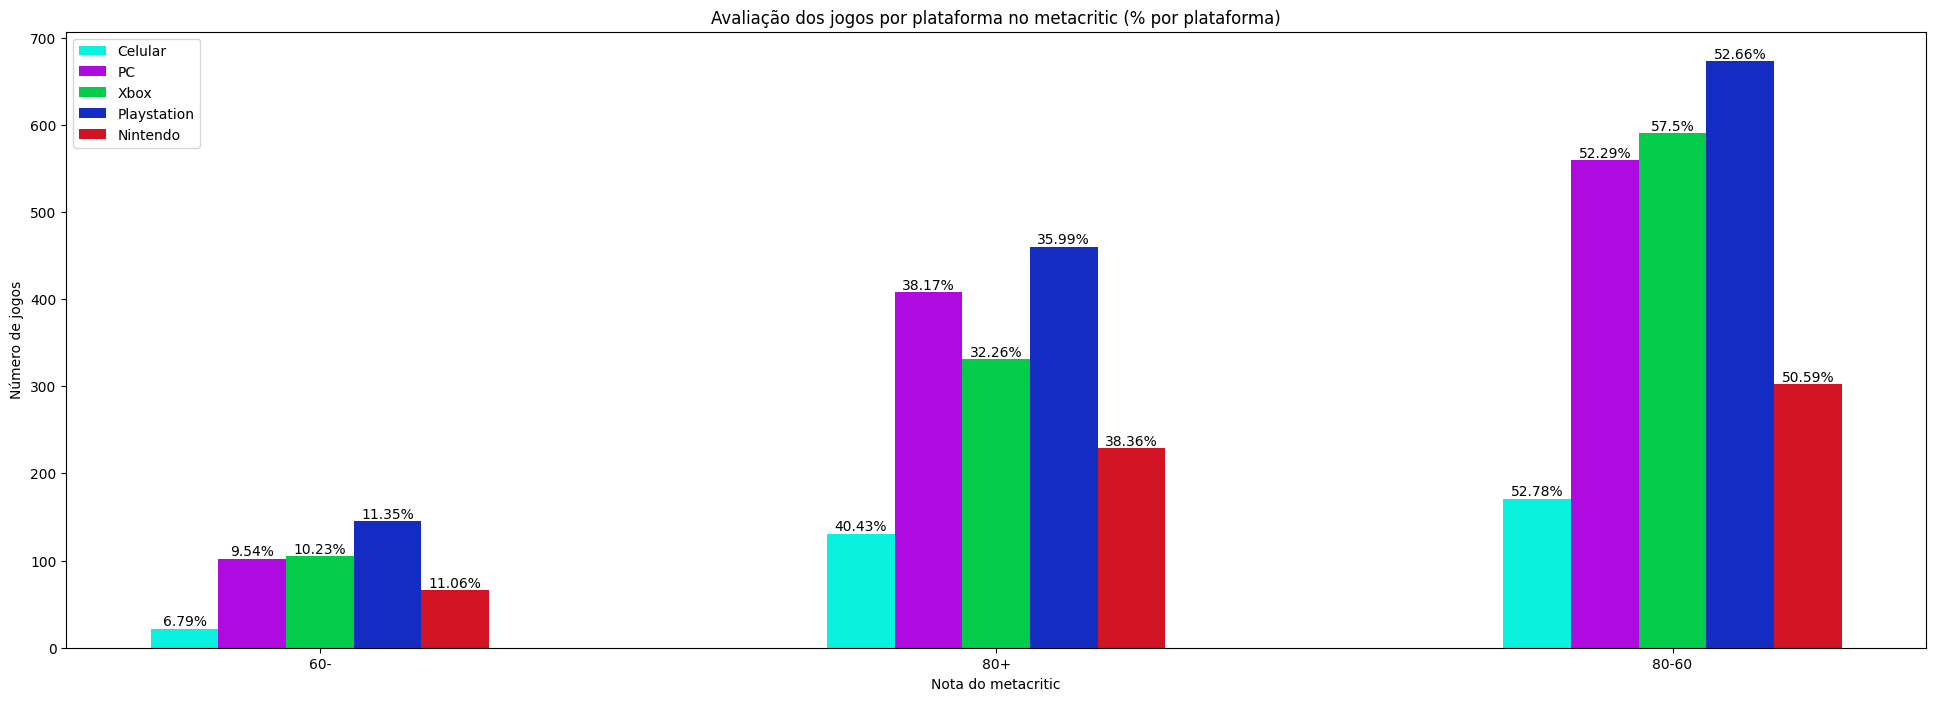

In [30]:
xbox_meta=dados_xbox.groupby(['metacritic_class']).count()
plays_meta=dados_plays.groupby(['metacritic_class']).count()
nint_meta=dados_nint.groupby(['metacritic_class']).count()
pc_meta=dados_pc.groupby(['metacritic_class']).count()
cell_meta=dados_cell.groupby(['metacritic_class']).count()

fig, ax = plt.subplots(figsize = (24, 8))
plt.xlabel('Nota do metacritic')
plt.ylabel('Número de jogos')
plt.title("Avaliação dos jogos por plataforma no metacritic (% por plataforma)")

grupos=['60-','80+','80-60']
width_bar=0.1
x=np.arange(len(grupos))

aux=ax.bar(x-0.20,cell_meta['metacritic'],color=color_cell,width=width_bar)
ax.bar_label(aux,labels=transToPorcen(dados_cell,cell_meta))

aux=ax.bar(x-0.1,pc_meta['metacritic'],color=color_pc,width=width_bar)
ax.bar_label(aux,labels=transToPorcen(dados_pc,pc_meta))

aux=ax.bar(x,xbox_meta['metacritic'],color=color_xbox,width=width_bar)
ax.bar_label(aux,labels=transToPorcen(dados_xbox,xbox_meta))

aux=ax.bar(x+0.1,plays_meta['metacritic'],color=color_plays,width=width_bar)
ax.bar_label(aux,labels=transToPorcen(dados_plays,plays_meta))

aux=ax.bar(x+0.20,nint_meta['metacritic'],color=color_nint,width=width_bar)
ax.bar_label(aux,labels=transToPorcen(dados_nint,nint_meta))


ax.axes.set_xticks(x,grupos)
plt.legend(['Celular','PC','Xbox','Playstation','Nintendo'],loc='upper left')

## Distribuição da faixa etária dos jogos em cada plataforma

Os jogos são classificados em 5 faixa etárias diferentes:

**Everyone:** Liberado para todos os públicos.

**Everyone 10+:** Não recomendado para menores de 10 anos.

**Tenn:** Não recomendado para menores de 13 anos.

**Mature:** Não recomendado para menores de 17 anos.

**Adults Only:** Não recomendado para menores de 18 anos.

Na nossa base de dados a maioria dos jogos possui classificação 'Teen', seguido pelo 'Mature', mais abaixo está o 'Everyone 10+' e o 'Everyone', por último está o 'Adults Only' com menos de 100 jogos.

Em relação as plataformas se observa que os jogos do Xbox e Playstation focam na faixas etárias 'Mature' (33,53% e 31,14%) e 'Teen' (32,21% e 34,82%), o que já é esperado pois possuem mais jogos violentos assim como os computadores. Já a Nintendo foca principalmente no 'Teen' (34,17%) e 'Everyone 10+' (25,96%), o que faz sentido pois a Nintendo foca mais no público infantil. Os jogos de computador focam mais no público 'Teen' (36,11%), com um foco um pouco menor no 'Mature'(28,34%). E por último tem os celulares que focam no público 'Teen' (39,81%) e 'Everyone 10+' (32,72%), o que faz sentido pois os jogos de celulares são simples e procuram atrair o maior público possível.

Com essa análise podemos ver que apesar da faixa etária não influenciar muito nas notas do metacritic, ela expõe qual é o publico alvo de cada plataforma.

In [34]:
print(len(dados_filtrados[dados_filtrados['esrb_rating']=='Mature']))
print(len(dados_filtrados[dados_filtrados['esrb_rating']=='Adults Only']))
print(len(dados_filtrados[dados_filtrados['esrb_rating']=='Teen']))
print(len(dados_filtrados[dados_filtrados['esrb_rating']=='Everyone']))
print(len(dados_filtrados[dados_filtrados['esrb_rating']=='Everyone 10+']))

722
92
900
362
460


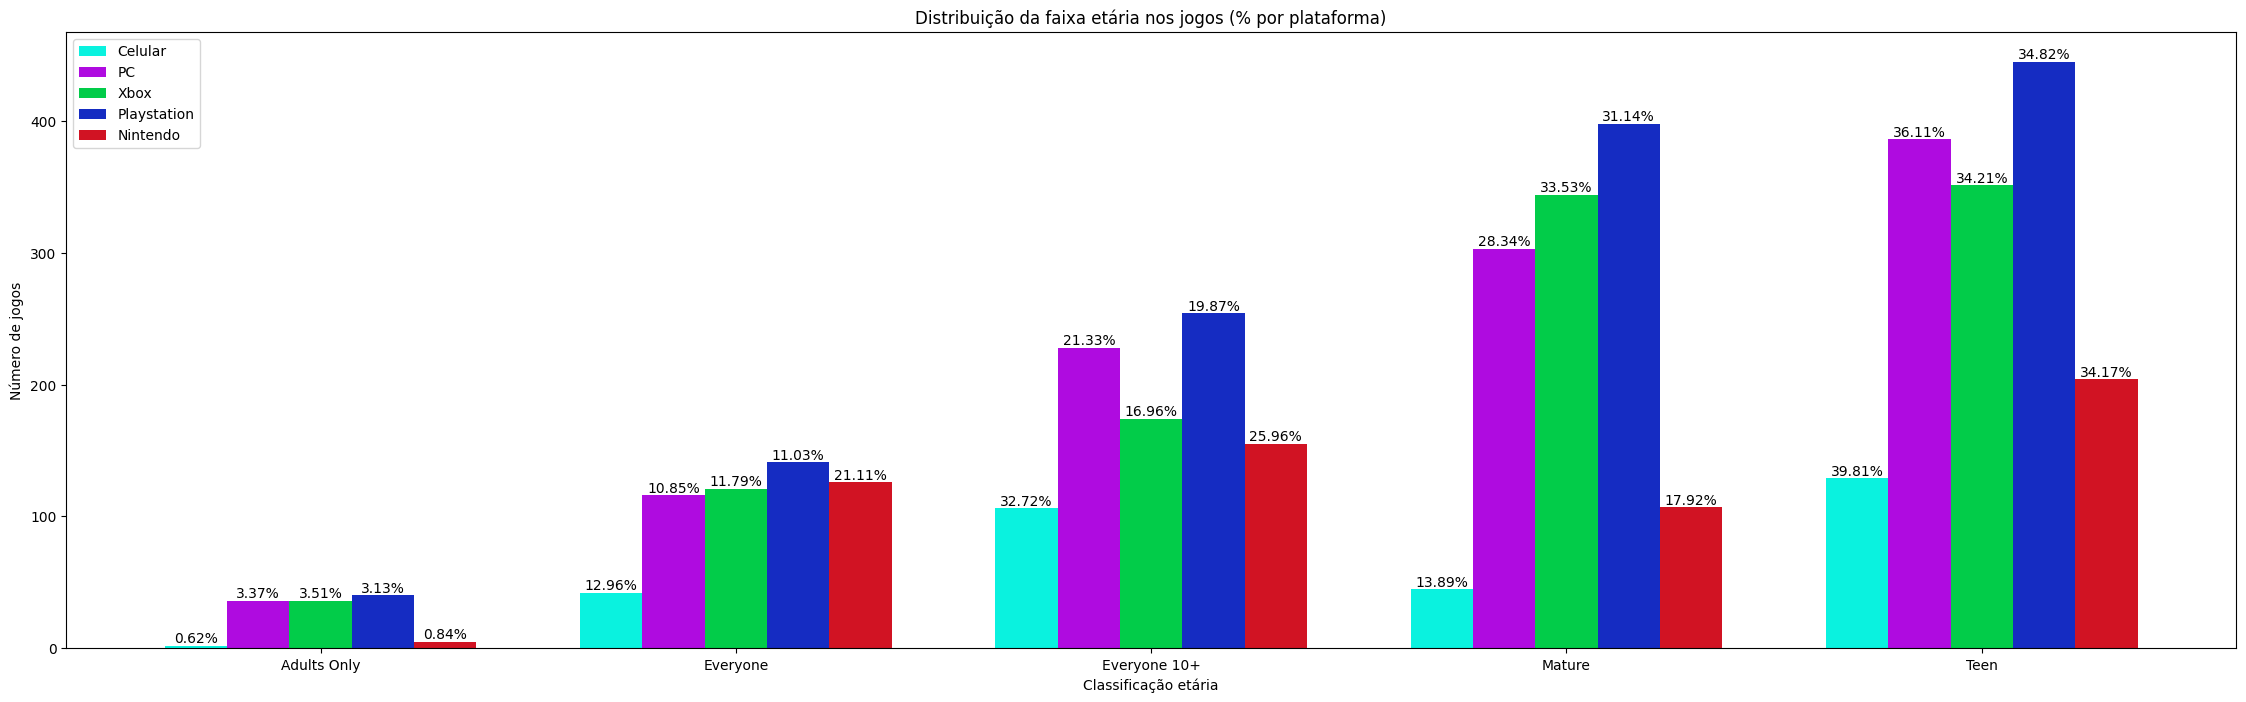

In [33]:
xbox_meta=dados_xbox.groupby(['esrb_rating']).count()
plays_meta=dados_plays.groupby(['esrb_rating']).count()
nint_meta=dados_nint.groupby(['esrb_rating']).count()
pc_meta=dados_pc.groupby(['esrb_rating']).count()
cell_meta=dados_cell.groupby(['esrb_rating']).count()

fig, ax = plt.subplots(figsize = (28, 8))
plt.xlabel('Classificação etária')
plt.ylabel('Número de jogos')
plt.title("Distribuição da faixa etária nos jogos (% por plataforma)")

grupos=['Adults Only','Everyone','Everyone 10+', 'Mature', 'Teen']
width_bar=0.15
x=np.arange(len(grupos))

aux=ax.bar(x-0.3,cell_meta['metacritic'],color=color_cell,width=width_bar)
ax.bar_label(aux,labels=transToPorcen(dados_cell,cell_meta))

aux=ax.bar(x-0.15,pc_meta['metacritic'],color=color_pc,width=width_bar)
ax.bar_label(aux,labels=transToPorcen(dados_pc,pc_meta))

aux=ax.bar(x,xbox_meta['metacritic'],color=color_xbox,width=width_bar)
ax.bar_label(aux,labels=transToPorcen(dados_xbox,xbox_meta))

aux=ax.bar(x+0.15,plays_meta['metacritic'],color=color_plays,width=width_bar)
ax.bar_label(aux,labels=transToPorcen(dados_plays,plays_meta))

aux=ax.bar(x+0.30,nint_meta['metacritic'],color=color_nint,width=width_bar)
ax.bar_label(aux,labels=transToPorcen(dados_nint,nint_meta))


ax.axes.set_xticks(x,grupos)
plt.legend(['Celular','PC','Xbox','Playstation','Nintendo'],loc='upper left')

# Passo 9

Como última parte do trabalho vai se aproveitar os dados analisados para montar um software de machine learning que vai tentar prever em que categoria se encontra um jogo em relção ao metacritic, em bom (80+), regular (80-60) ou ruim
 (60-). As colunas selecionadas serão as mesmas dos dados **dados_filtrados**, tirando apenasas colunas 'added_status_...', já que eleas conteriam dados que seriam disponibilizados depois da nota do metacritic.

Podemos observar que a maior parte dos dos jogos são considerados regular(1317 registros), seguido pelos bons(947 registros), e por último os ruins (272 registros)

**Obs:** Apesar do esrb_rating não ter demonstrado uma relção clara com as notas do metacritic, a sua utilização para o aprendizado de máquina elevou um pouco a acurácia.

In [39]:
dados_ml= dados_filtrados.filter(items=['playtime','achievements_count','xbox','nintendo','playstation','pc','cell_phone','game_series_count','number_plataforms','esrb_rating','metacritic_class'])
print(len(dados_ml[dados_ml['metacritic_class']=='80+']))
print(len(dados_ml[dados_ml['metacritic_class']=='80-60']))
print(len(dados_ml[dados_ml['metacritic_class']=='60-']))

947
1317
272


# Passo 10
Usar o labelEncoder pra transformar todos os valores categóricos em numéricos

In [40]:
le = LabelEncoder()
dados_ml["xbox"]=le.fit_transform(dados_ml["xbox"]);
dados_ml["nintendo"]=le.fit_transform(dados_ml["nintendo"]);
dados_ml["playstation"]=le.fit_transform(dados_ml["playstation"]);
dados_ml["pc"]=le.fit_transform(dados_ml["pc"]);
dados_ml["cell_phone"]=le.fit_transform(dados_ml["cell_phone"]);
dados_ml["esrb_rating"]=le.fit_transform(dados_ml["esrb_rating"]);
dados_ml["metacritic_class"]=le.fit_transform(dados_ml["metacritic_class"]);

#Passo 11

Separação da coluna que será preditada (target) das colunas que seram usadas para chegar no resultado da predição (atributos). Além disso também se separou os dados em conjunto de teste e conjunto de treino

In [41]:
X = dados_ml[['playtime','xbox','nintendo','playstation','pc','cell_phone','game_series_count','achievements_count','number_plataforms','esrb_rating']] # atributos
Y = dados_ml['metacritic_class'] # classe (target)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=7) # faz a divisão

# Passo 12
Instanciação de vários modelos de machine learning, aplicando neles também a normalização dos dados através dos pipelines. E logo em seguida treinar todos esses modelos com o conjunto de treino e testalos com o conjuntode teste, para verificar que modelo se saiu melhor.

In [42]:
min_max_scaler = ('MinMaxScaler', MinMaxScaler())
num_trees = 200
bases = []
model1 = KNeighborsClassifier()
bases.append(('knn', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))
model4 = GaussianNB()
bases.append(('nb', model4))
model5 = LogisticRegression()
bases.append(('logistic', model5))

models=[]
models.append(('KNN', Pipeline([min_max_scaler,('KNN',KNeighborsClassifier())])))
models.append(('CART', Pipeline([min_max_scaler,('CART',DecisionTreeClassifier())])))
models.append(('NB', Pipeline([min_max_scaler,('NB',GaussianNB())])))
models.append(('SVM', Pipeline([min_max_scaler,('SVM',SVC())])))
models.append(('Ada', Pipeline([min_max_scaler,('Ada',AdaBoostClassifier(n_estimators=num_trees))])))
models.append(('Voting', Pipeline([min_max_scaler,('Vot',VotingClassifier(bases))])))
models.append(('GB', Pipeline([min_max_scaler,('gb',GradientBoostingClassifier(n_estimators=num_trees))])))
models.append(('SVM', Pipeline([min_max_scaler,('SVM',SVC())])))

for name,model in models:
  model.fit(X_train, Y_train)
  # Fazendo as predições com o conjunto de teste
  predictions = model.predict(X_test)
  # Estimando a acurácia no conjunto de teste
  print(name,': ',accuracy_score(Y_test, predictions))

KNN :  0.5059055118110236
CART :  0.49606299212598426
NB :  0.5196850393700787
SVM :  0.5570866141732284
Ada :  0.5728346456692913
Voting :  0.5570866141732284
GB :  0.6043307086614174
SVM :  0.5570866141732284


# Conclusão
O modelo de machine learning que teve o melhor desempenho foi o GradientBoostingClassifier com uma acurácia de mais de 60%, considerando que a coluna que foi preditada possui três opções de valor. E ao longo desse projeto se pode observar como as notas do metacritic estão correlacinados com certas características dos jogos avaliados, e como elas influenciam na recepção do jogo pelo público. Além disso também se pode observar quais são as faixas etárias dos públicos alvos de cada plataforma.  